In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import missingno
path='../../data/raw_do_not_touch'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
X01 =  ['net profit / total assets']
X02 =  ['total liabilities / total assets']
X03 =  ['working capital / total assets']
X04 =  ['current assets / short-term liabilities']
X05 =  ['[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365']
X06 =  ['retained earnings / total assets']
X07 =  ['EBIT / total assets']
X08 =  ['book value of equity / total liabilities']
X09 =  ['sales / total assets']
X10 =  ['equity / total assets']
X11 =  ['(gross profit + extraordinary items + financial expenses) / total assets']
X12 =  ['gross profit / short-term liabilities']
X13 =  ['(gross profit + depreciation) / sales']
X14 =  ['(gross profit + interest) / total assets']
X15 =  ['(total liabilities * 365) / (gross profit + depreciation)']
X16 =  ['(gross profit + depreciation) / total liabilities']
X17 =  ['total assets / total liabilities']
X18 =  ['gross profit / total assets']
X19 =  ['gross profit / sales']
X20 =  ['(inventory * 365) / sales']
X21 =  ['sales (n) / sales (n-1)']
X22 =  ['profit on operating activities / total assets']
X23 =  ['net profit / sales']
X24 =  ['gross profit (in 3 years) / total assets']
X25 =  ['(equity - share capital) / total assets']
X26 =  ['(net profit + depreciation) / total liabilities']
X27 =  ['profit on operating activities / financial expenses']
X28 =  ['working capital / fixed assets']
X29 =  ['logarithm of total assets']
X30 =  ['(total liabilities - cash) / sales']
X31 =  ['(gross profit + interest) / sales']
X32 =  ['(current liabilities * 365) / cost of products sold']
X33 =  ['operating expenses / short-term liabilities']
X34 =  ['operating expenses / total liabilities']
X35 =  ['profit on sales / total assets']
X36 =  ['total sales / total assets']
X37 =  ['(current assets - inventories) / long-term liabilities']
X38 =  ['constant capital / total assets']
X39 =  ['profit on sales / sales']
X40 =  ['(current assets - inventory - receivables) / short-term liabilities']
X41 =  ['total liabilities / ((profit on operating activities + depreciation) * (12/365))']
X42 =  ['profit on operating activities / sales']
X43 =  ['rotation receivables + inventory turnover in days']
X44 =  ['(receivables * 365) / sales']
X45 =  ['net profit / inventory']
X46 =  ['(current assets - inventory) / short-term liabilities']
X47 =  ['(inventory * 365) / cost of products sold']
X48 =  ['EBITDA (profit on operating activities - depreciation) / total assets']
X49 =  ['EBITDA (profit on operating activities - depreciation) / sales']
X50 =  ['current assets / total liabilities']
X51 =  ['short-term liabilities / total assets']
X52 =  ['(short-term liabilities * 365) / cost of products sold)']
X53 =  ['equity / fixed assets']
X54 =  ['constant capital / fixed assets']
X55 =  ['working capital']
X56 =  ['(sales - cost of products sold) / sales']
X57 =  ['(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)']
X58 =  ['total costs /total sales']
X59 =  ['long-term liabilities / equity']
X60 =  ['sales / inventory']
X61 =  ['sales / receivables']
X62 =  ['(short-term liabilities *365) / sales']
X63 =  ['sales / short-term liabilities']
X64 =  ['sales / fixed assets']

In [5]:
dfs = [pd.read_csv(path+'/' +str(i+1) + 'year.txt',delimiter=',') for i in range(5)]
colnames = ['X' + str(i+1) for i in range(len(dfs[0].columns)-1)]
colnames.append('Y')

for df in dfs:
    df.columns = colnames

In [6]:
clean_dfs = [df.dropna(axis=0, how='any') for df in dfs]

for i in range(len(dfs)):
    print(str(i+1)+'year:', 'Missing obs=', len(dfs[i])-len(clean_dfs[i]))

1year: Missing obs= 3833
2year: Missing obs= 6085
3year: Missing obs= 5618
4year: Missing obs= 5023
5year: Missing obs= 2879


# Visualizing missing data
https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
https://github.com/ResidentMario/missingno

1year:

2year:

3year:

4year:

5year:



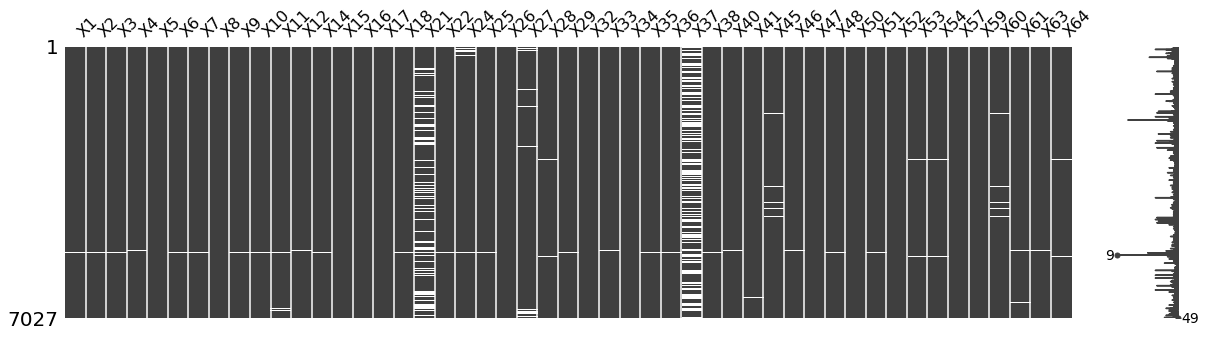

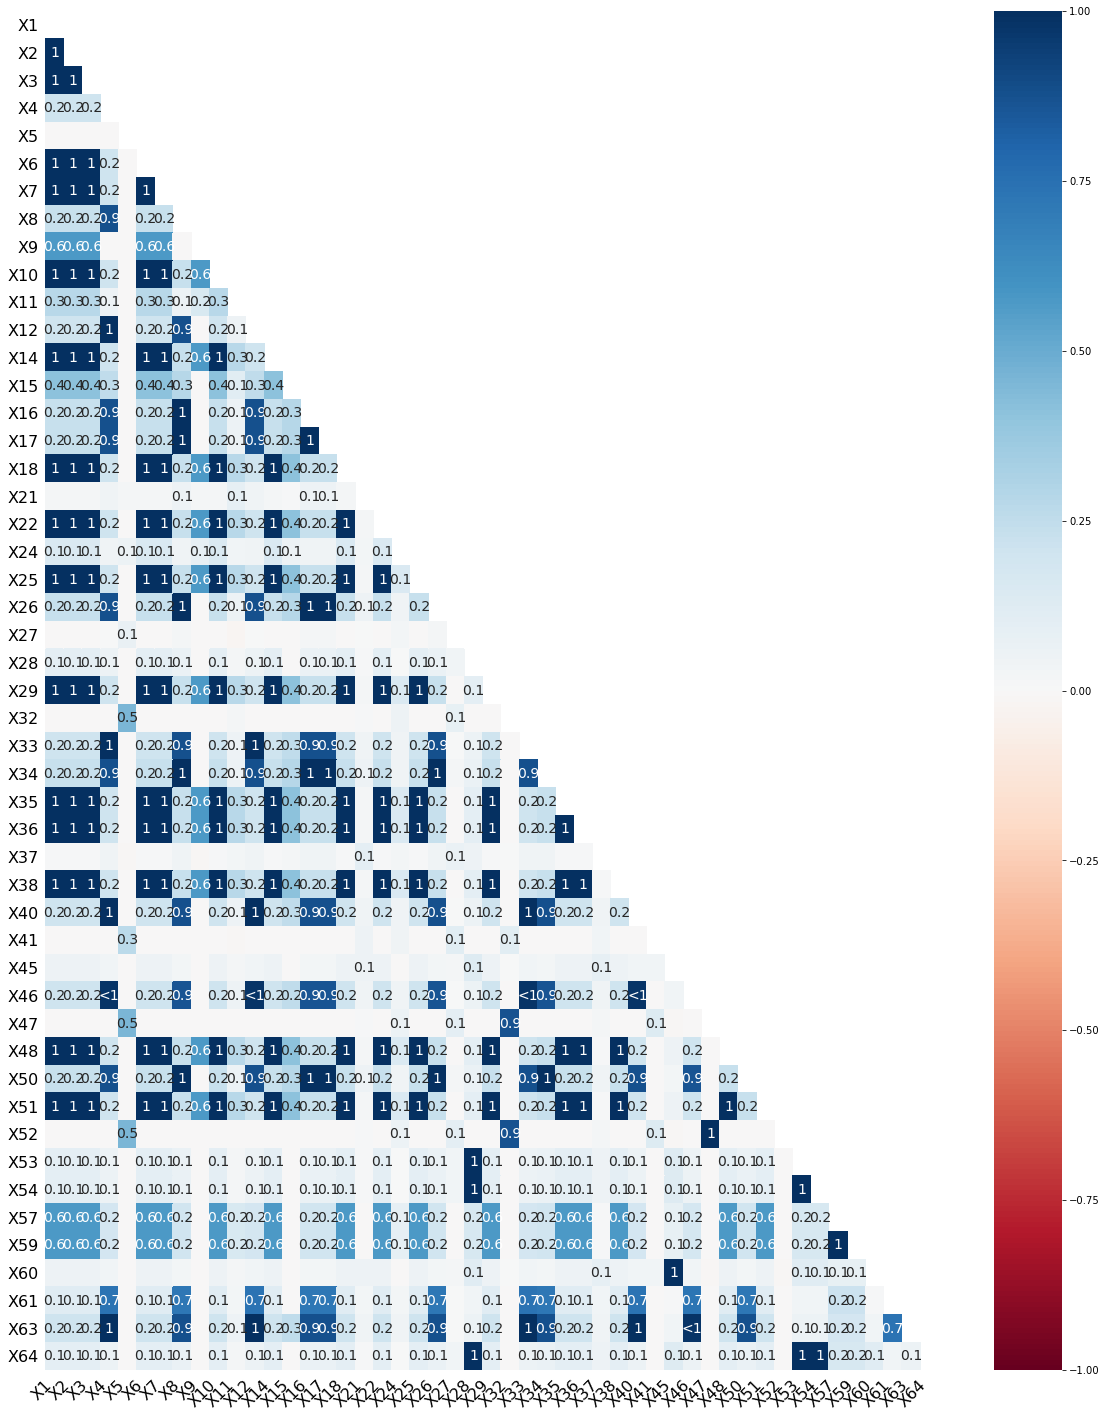

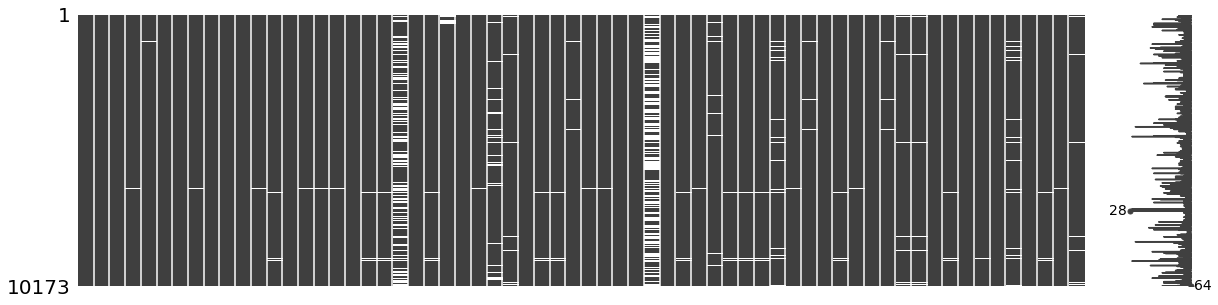

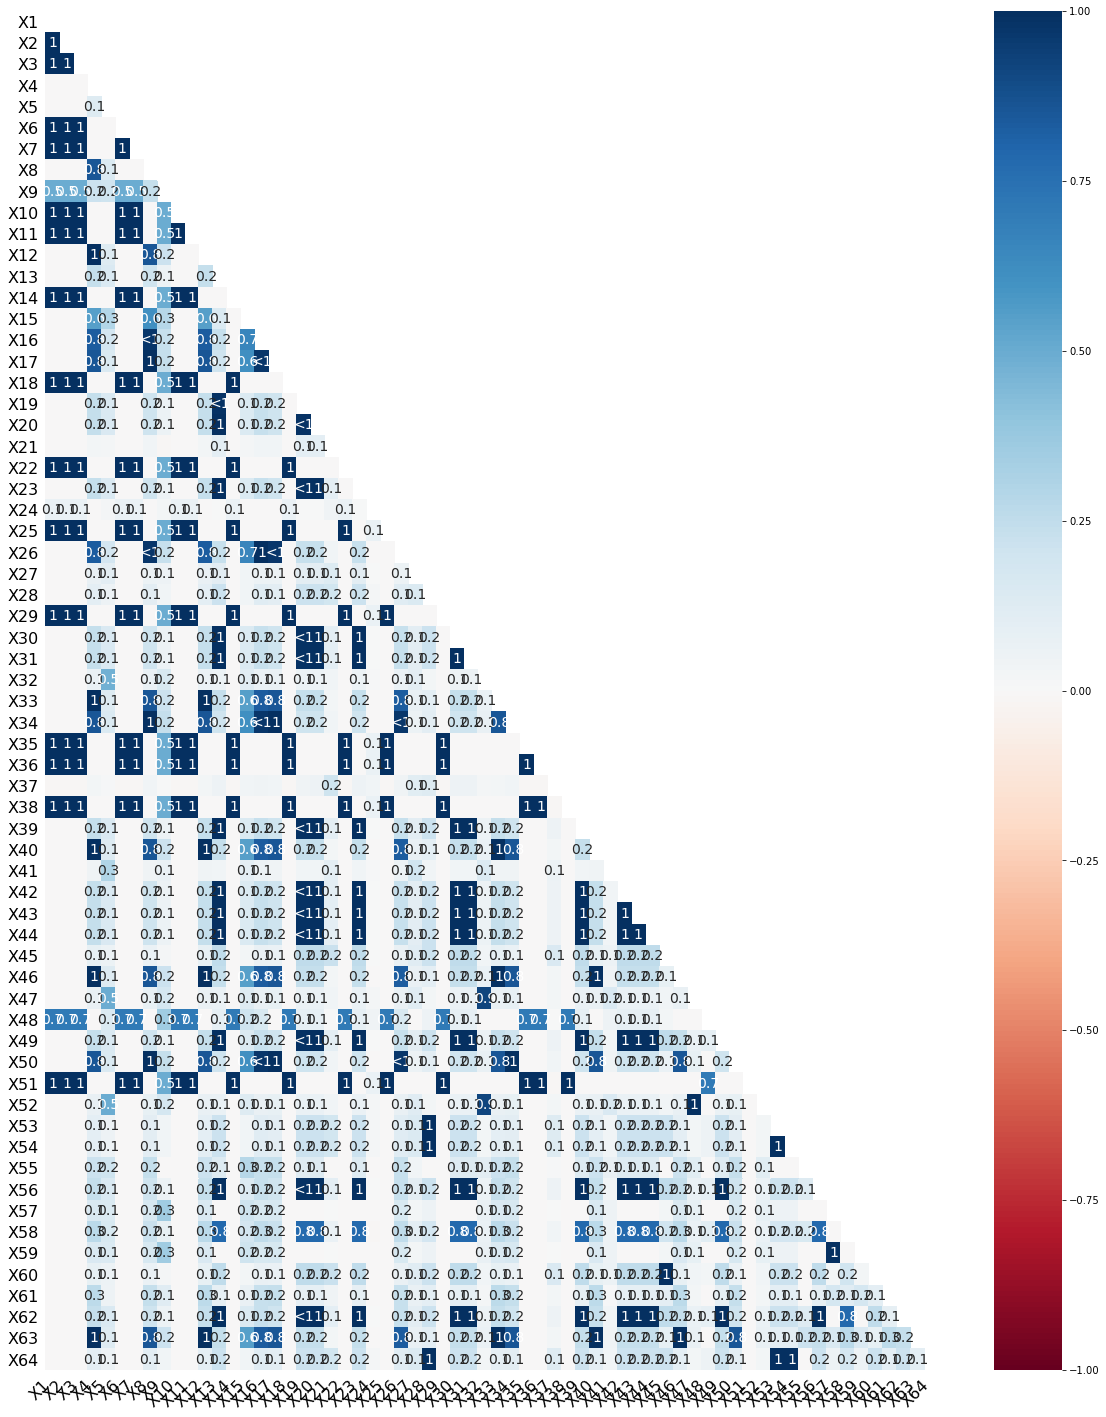

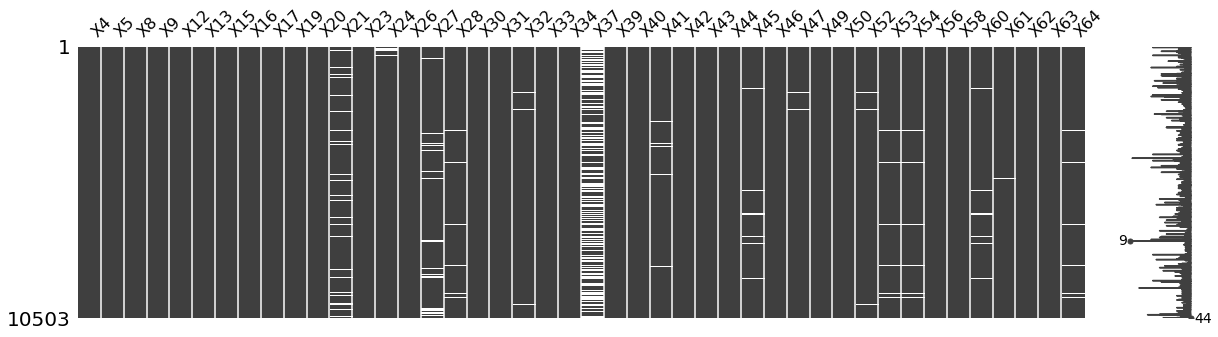

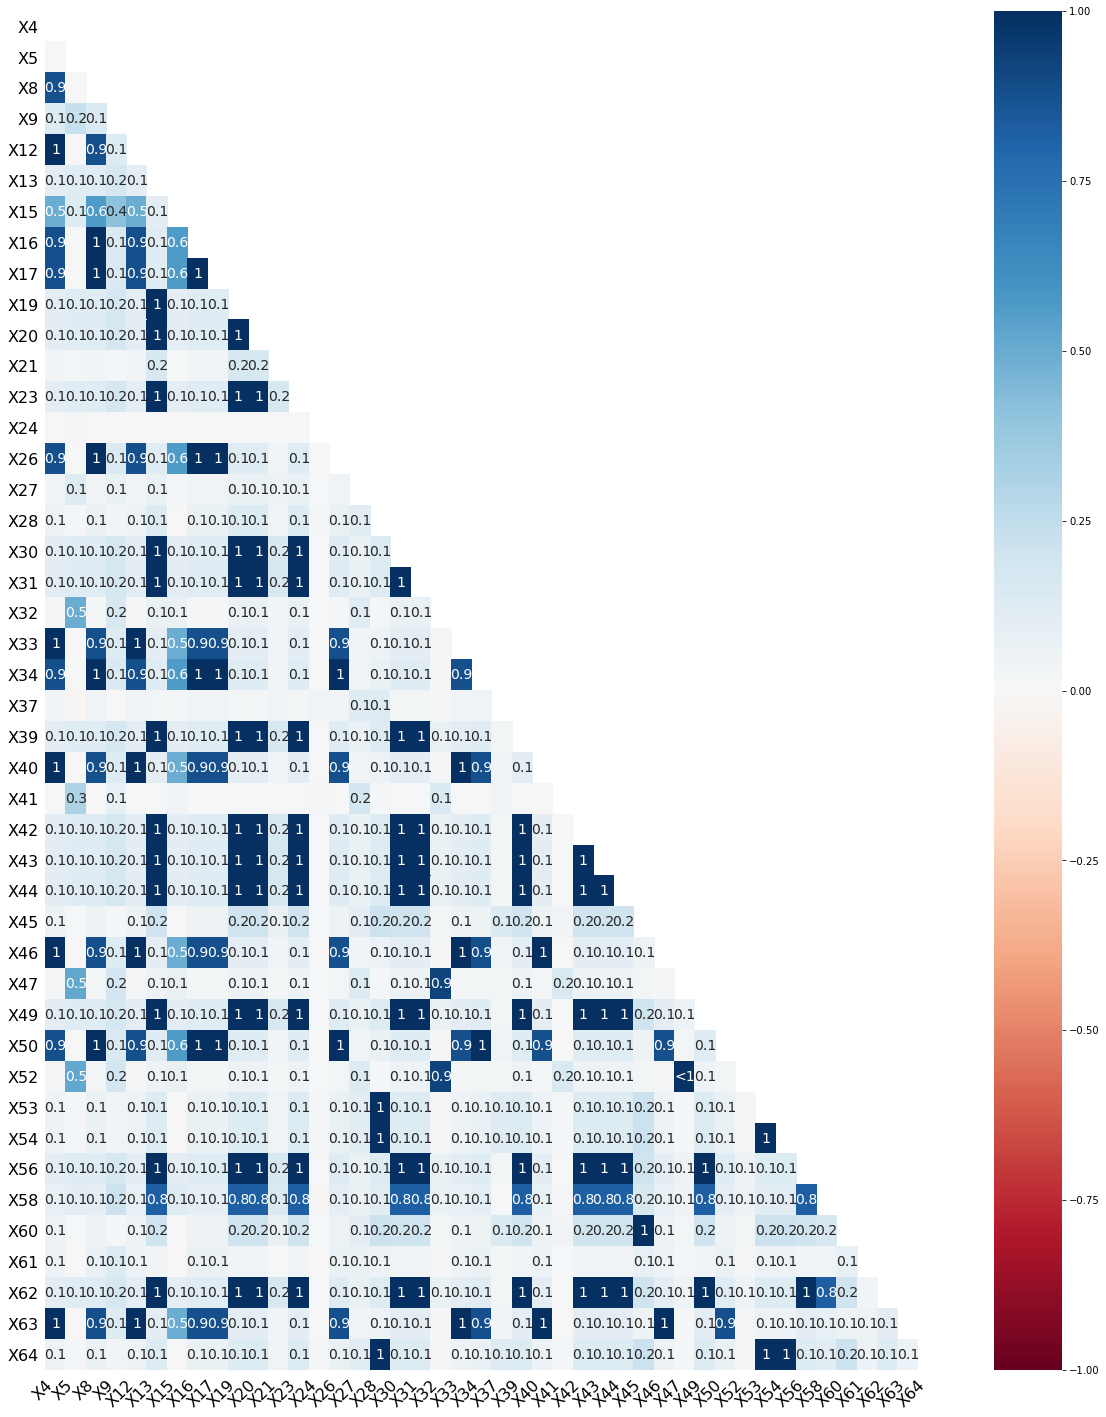

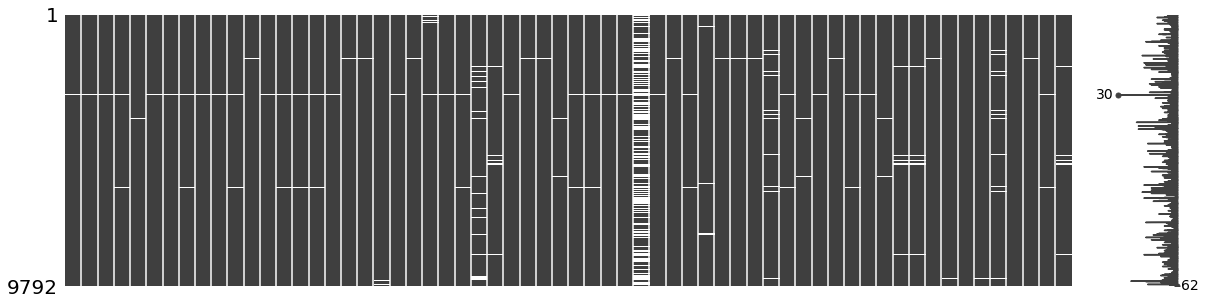

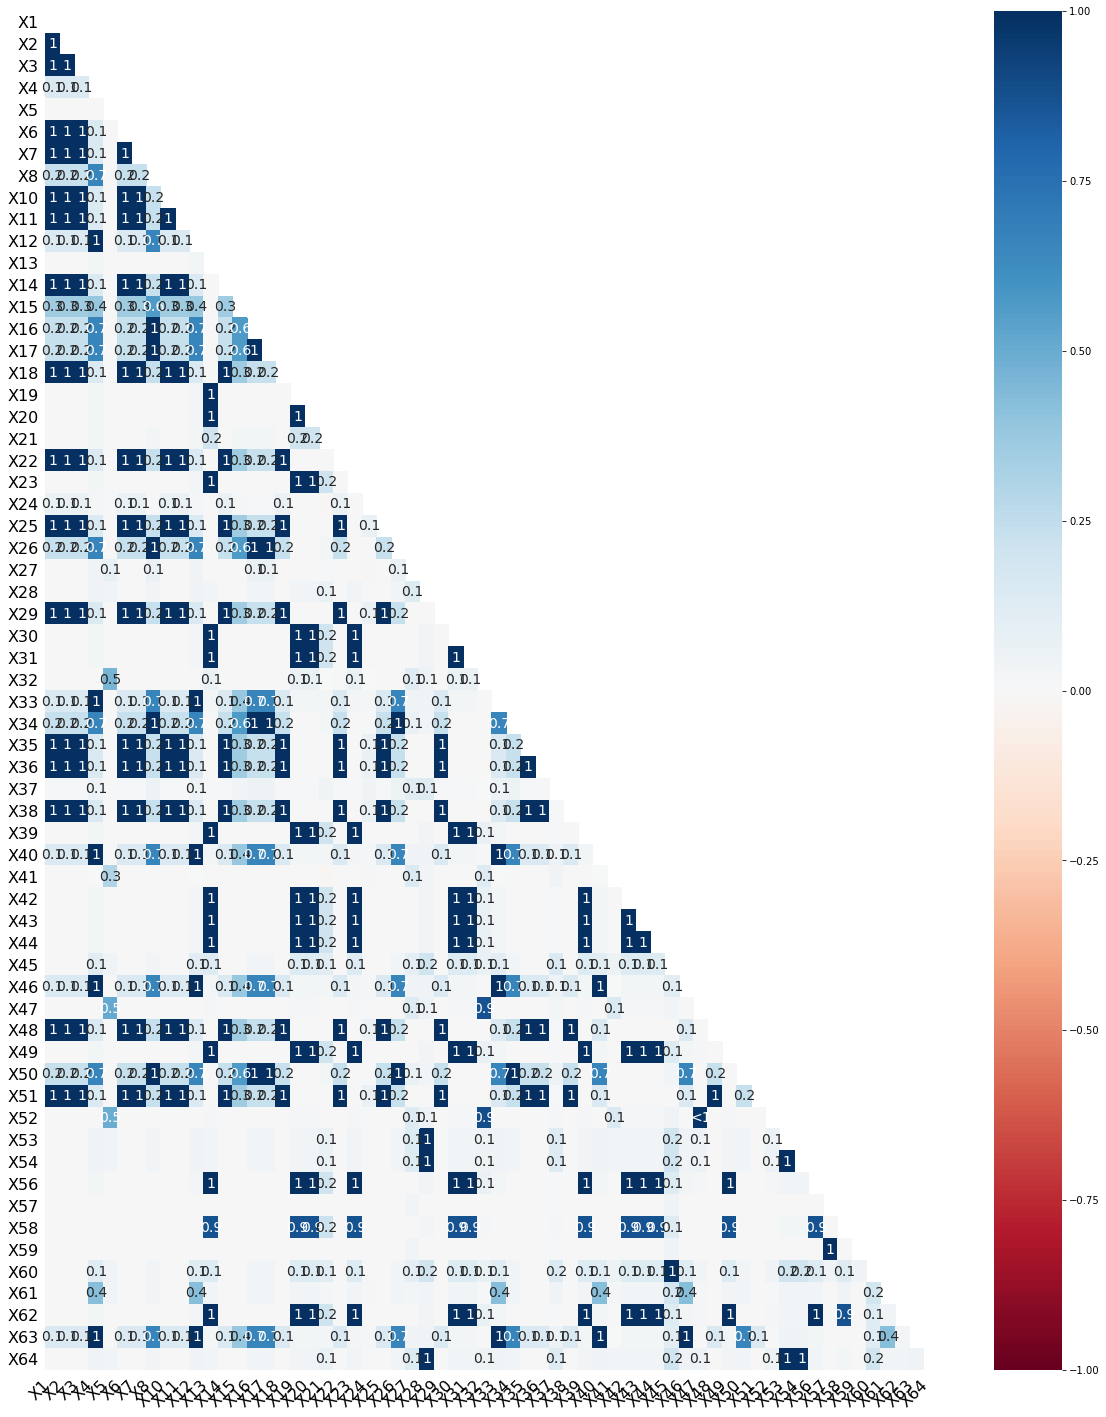

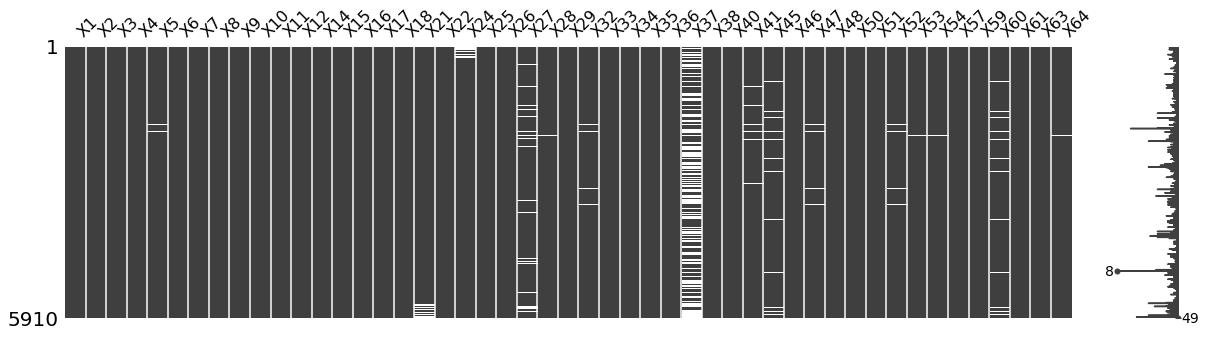

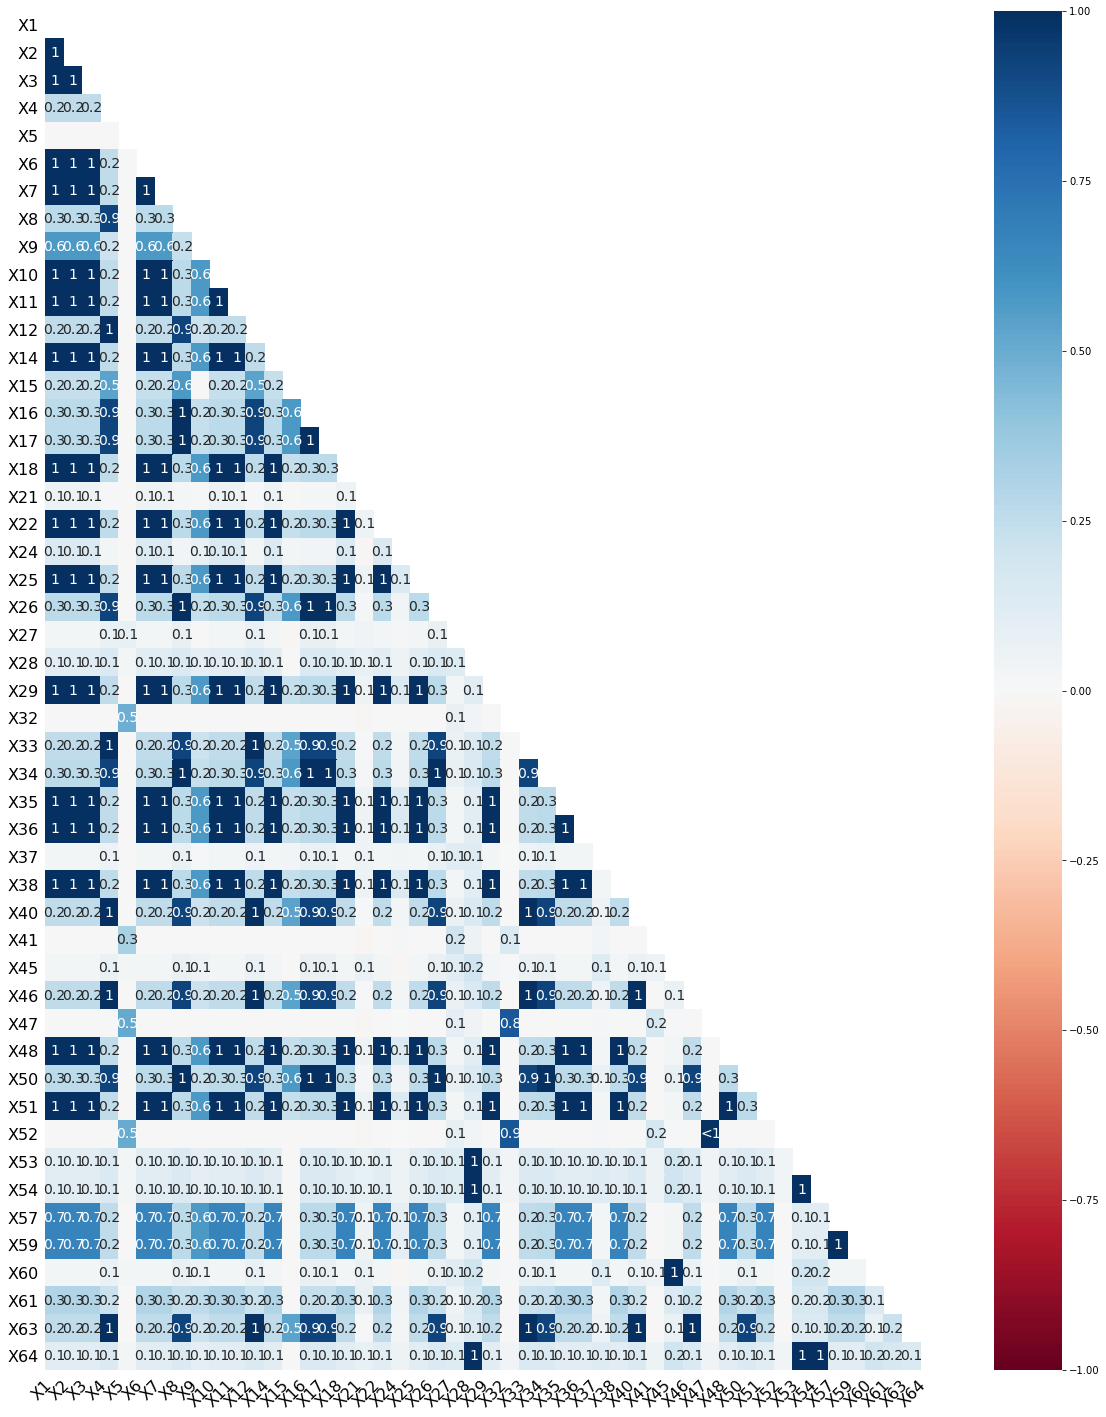

In [7]:
# Sparcity matrix, locate missing variables over the whole dataframe
for i in range(len(dfs)):
    missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
    print(str(i+1)+'year:\n')
    missingno.matrix(dfs[i][missing_df_i], figsize=(20,5))
    missingno.heatmap(dfs[i][missing_df_i],figsize=(20,25))

Clearly, dropping all missing will reduce the dataset by a lot. From heatmaps we see that some variables have a perfect relationship in being NaN together. This could indicate that NaNs are not distributed randomly....

# Correlation plots

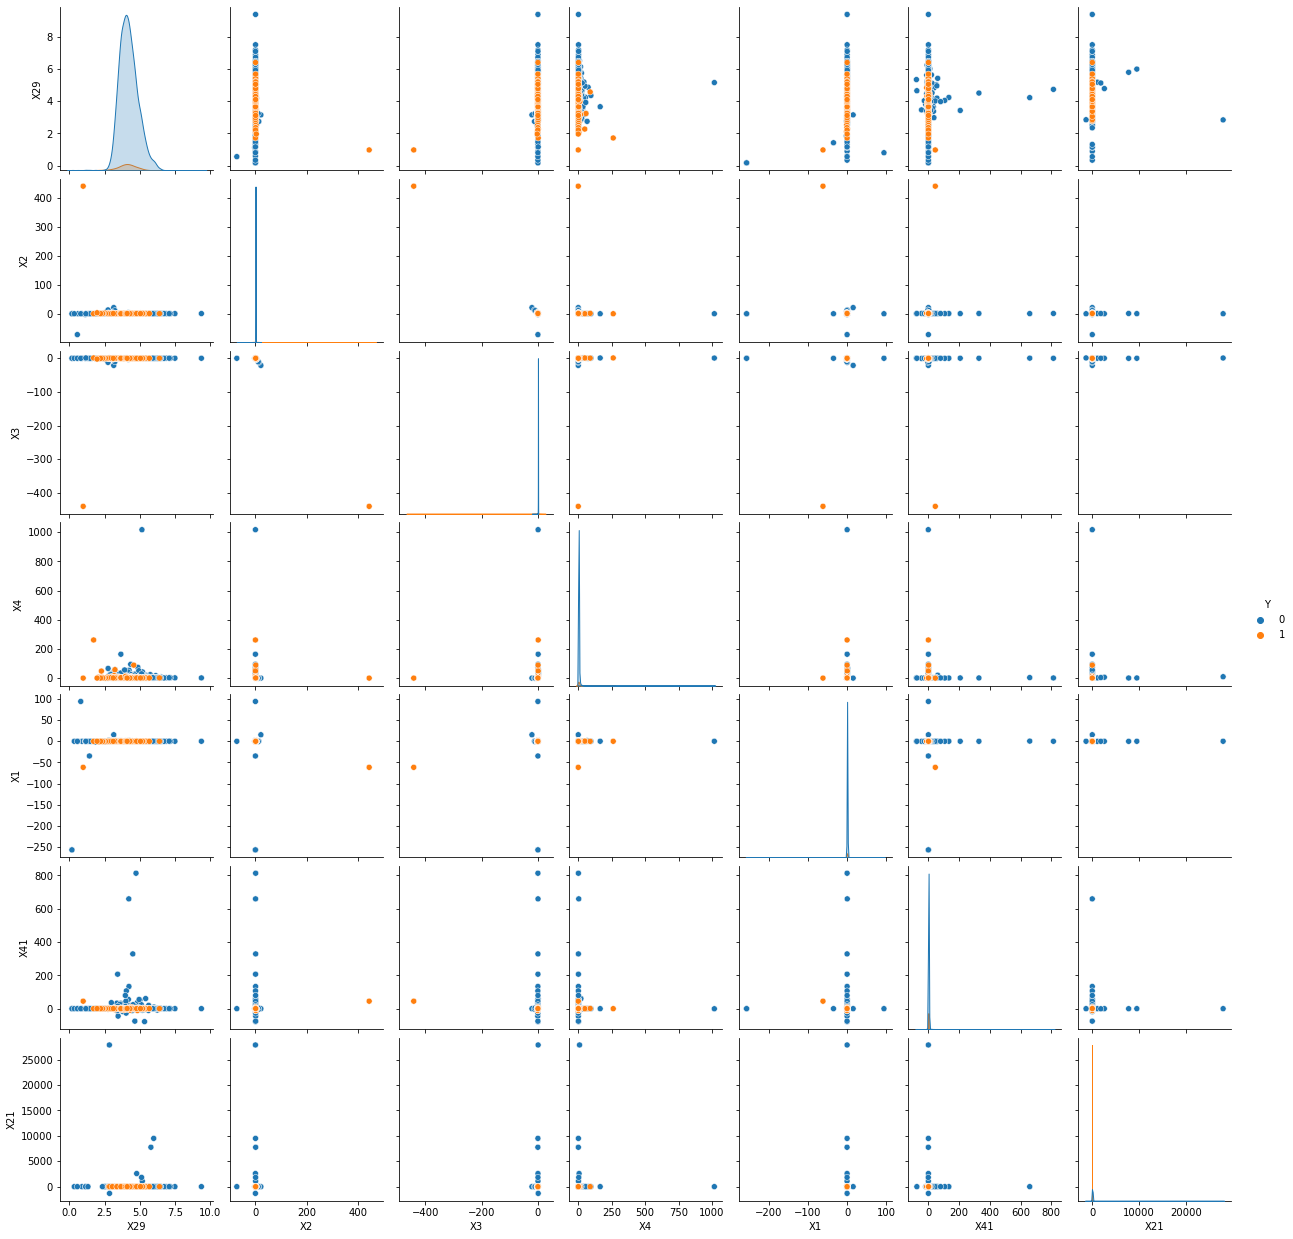

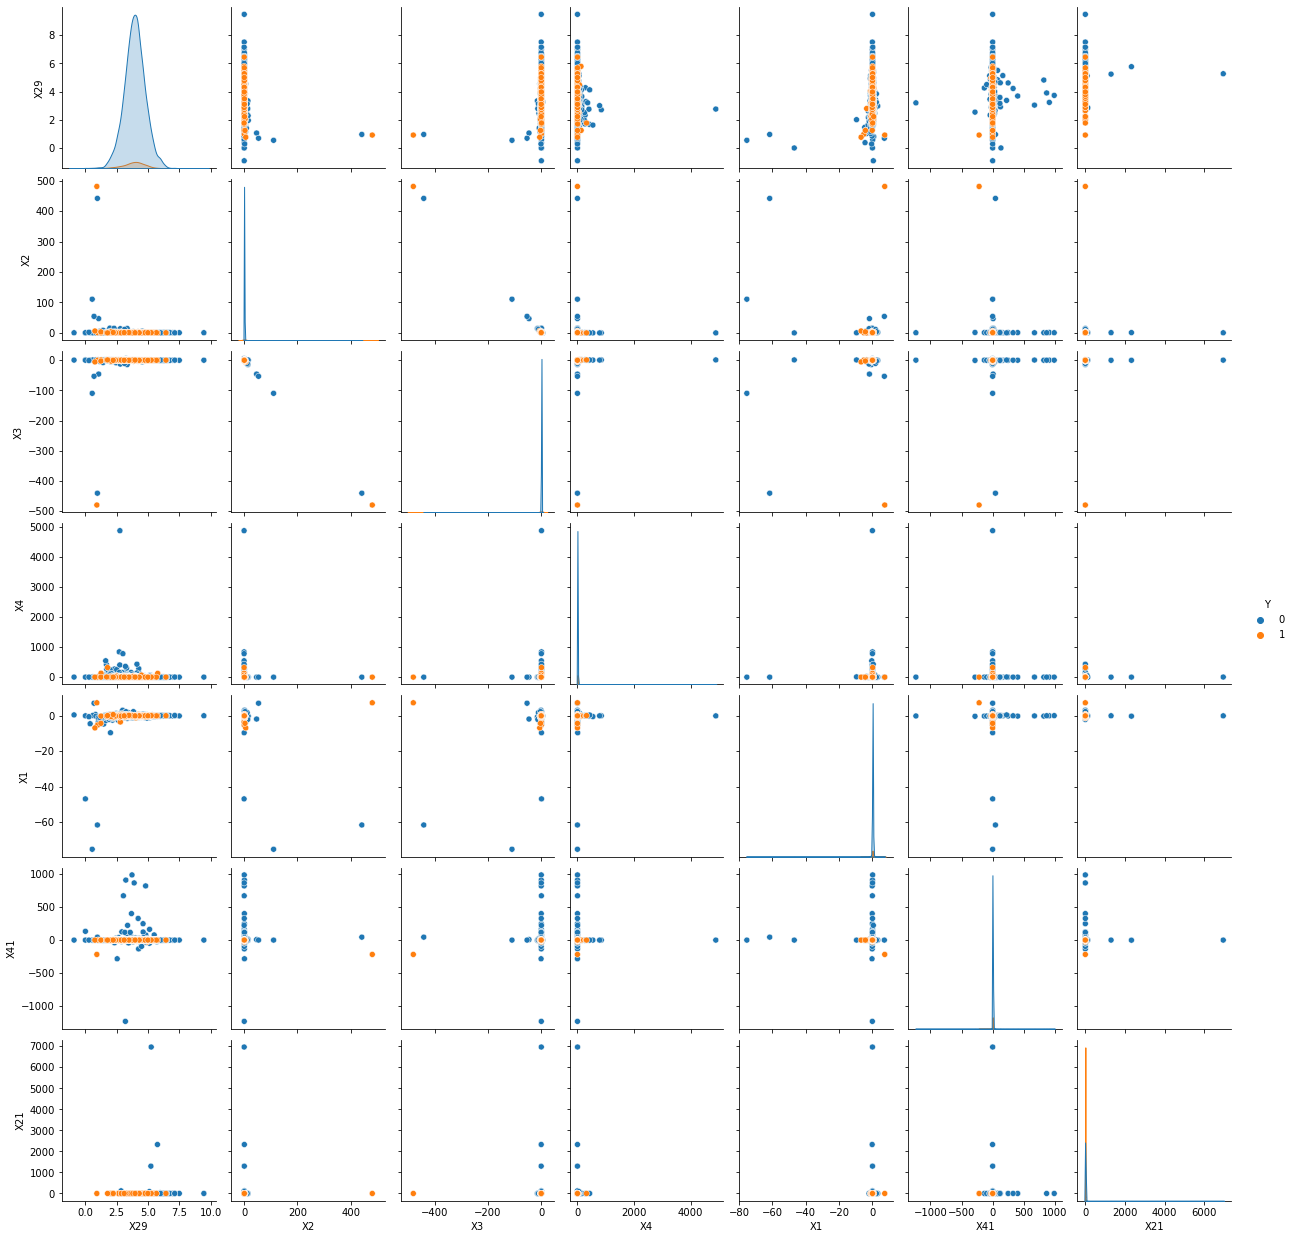

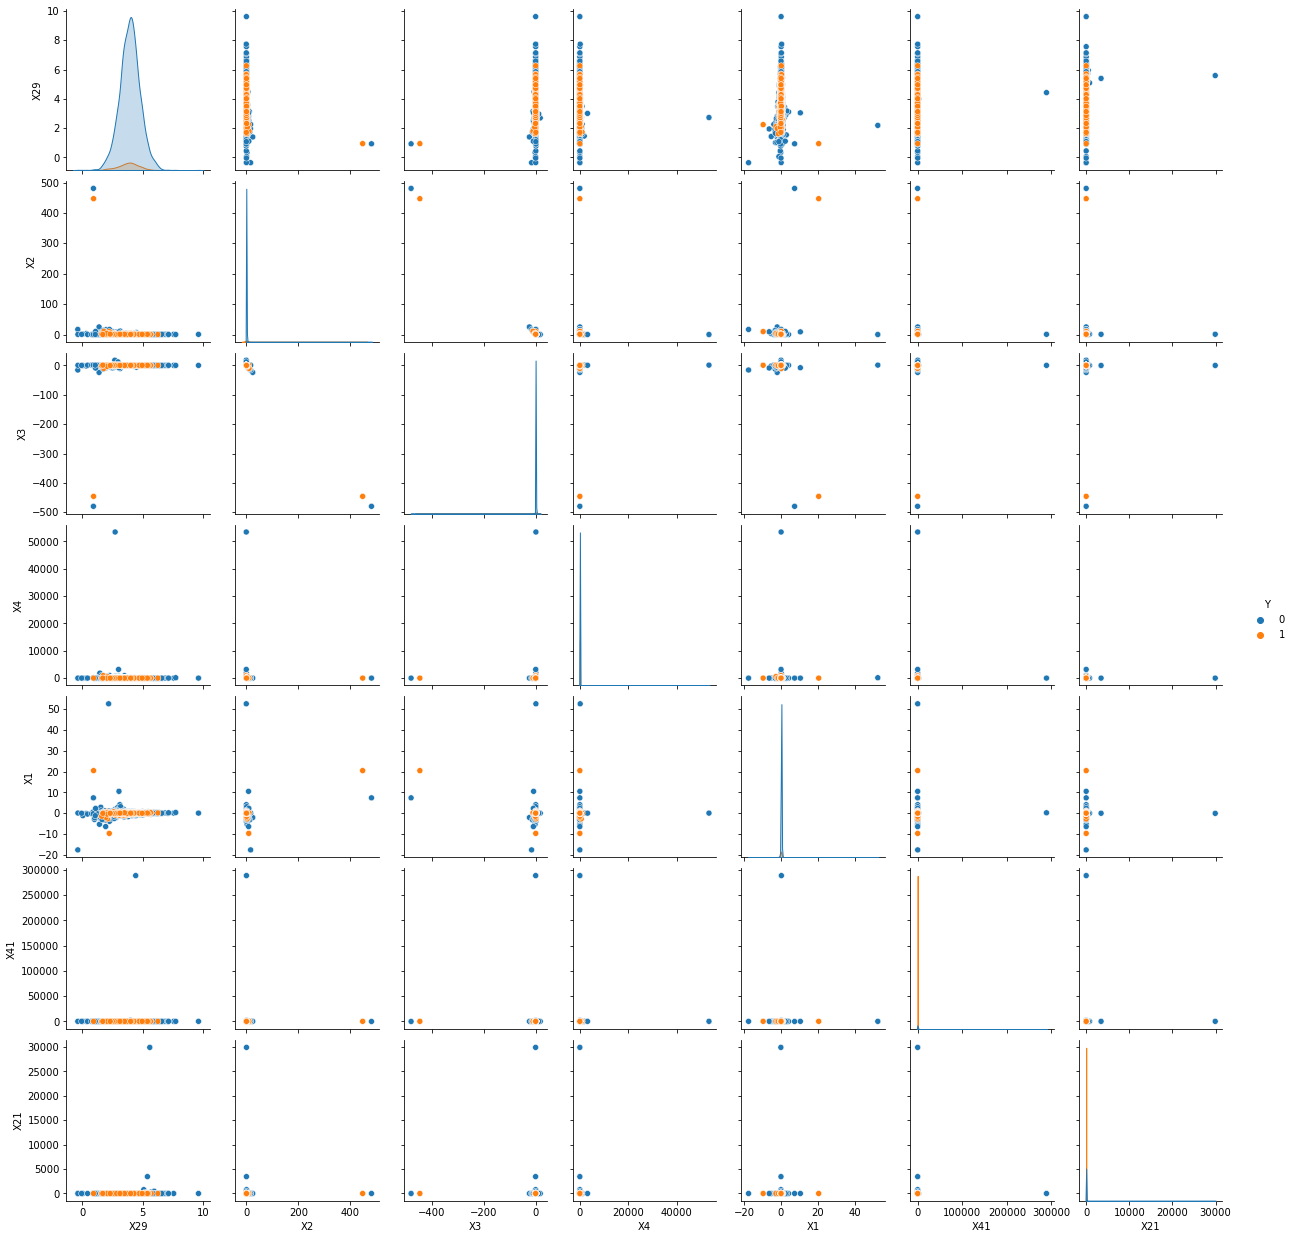

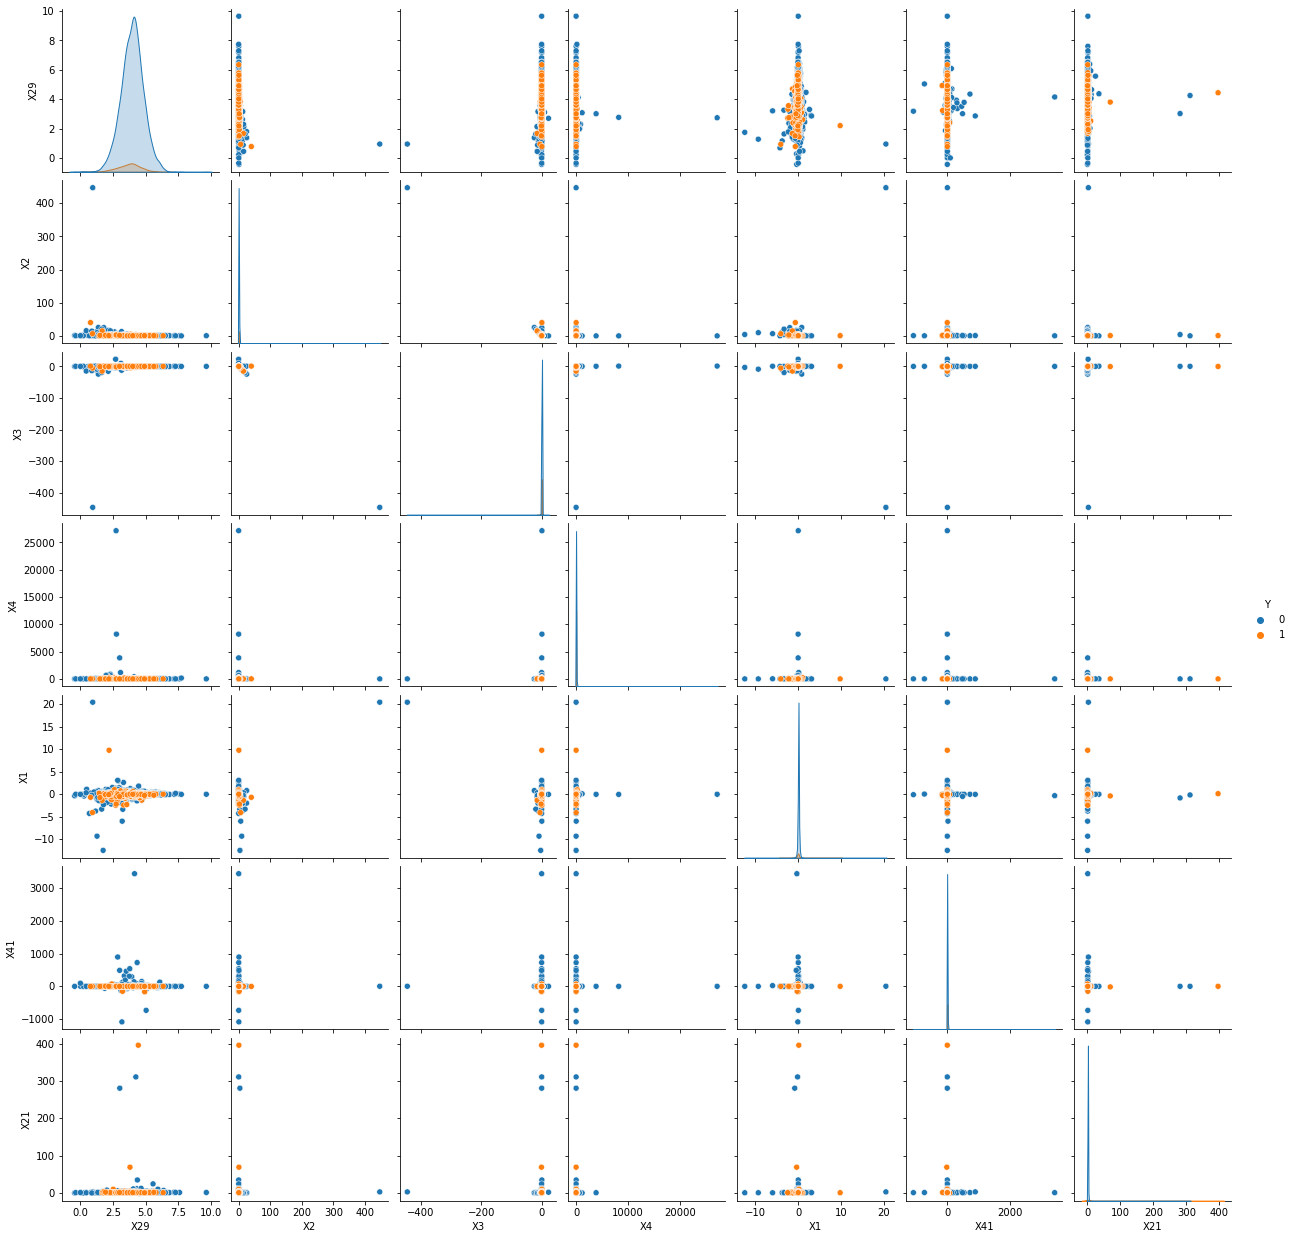

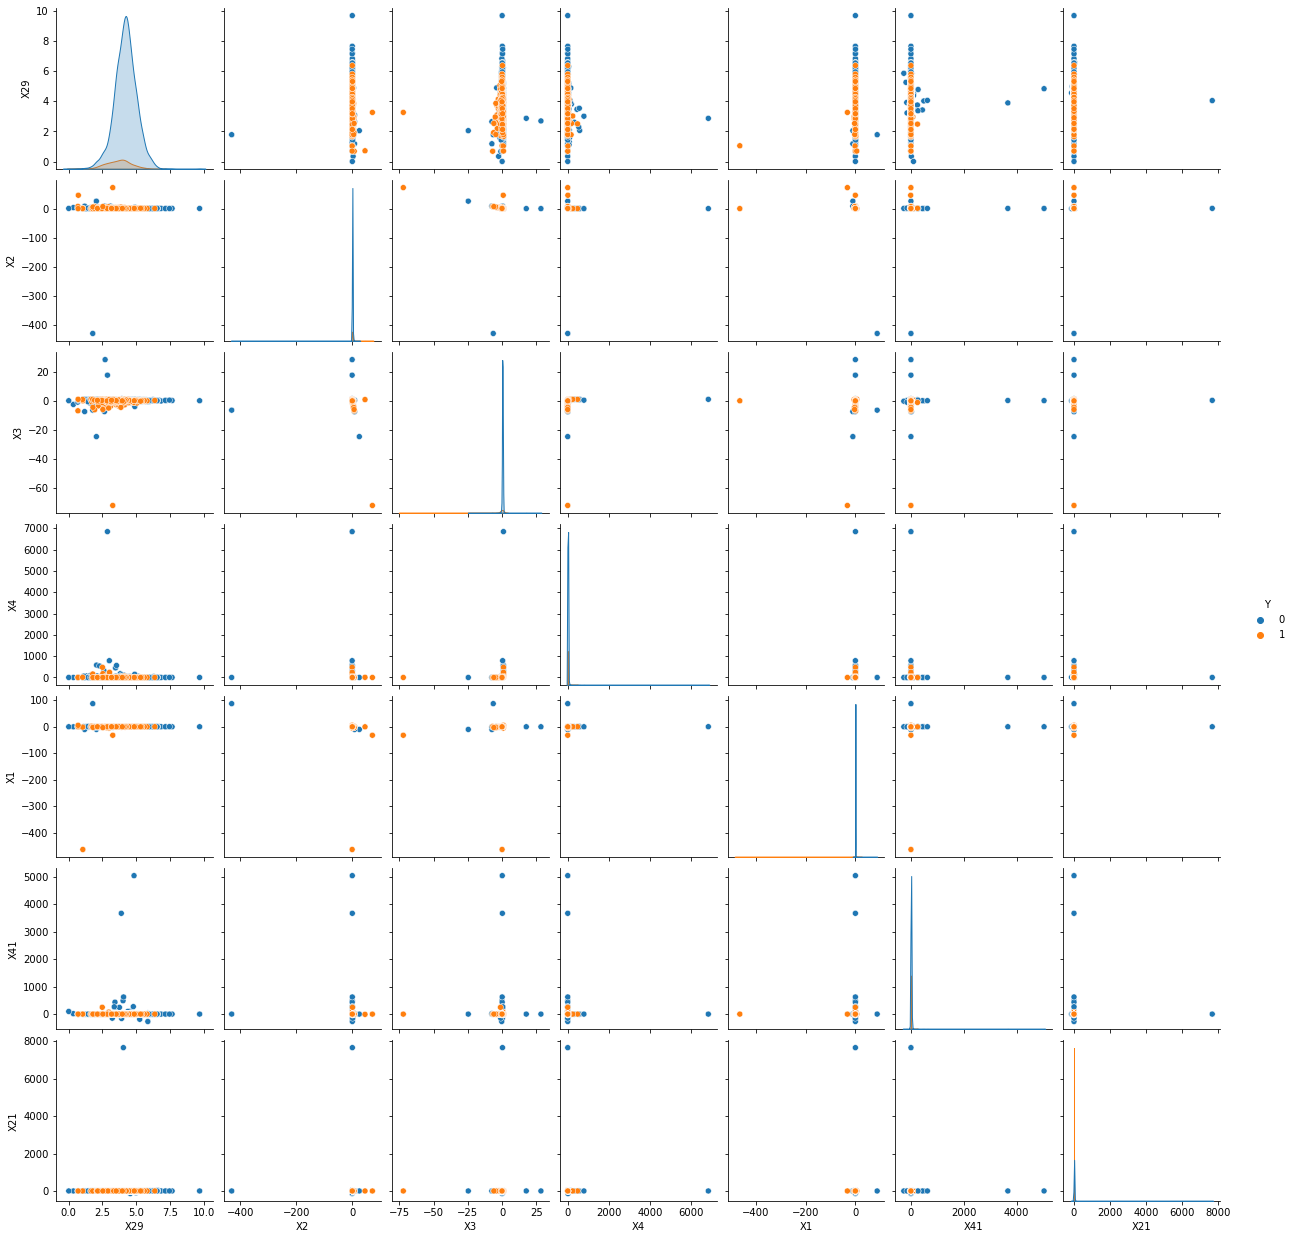

In [20]:
Y = ['Y']
ohlson_vars = X29 + X02 + X03 + X04 + X01 + X41 + X21 + Y  # without liability dummy
pairplot_dfs = [df[['X29','X2','X3','X4','X1','X41','X21','Y']] for df in dfs]
for i in range(len(dfs)):
    sns.pairplot(pairplot_dfs[i],hue='Y')

There is definitely some outlier here!! 

In [29]:
threshold = 3
np.where(np.abs(stats.zscore(dfs[1])) > threshold)

(array([ 9773,  9774,  9775,  9776,  9777,  9778,  9779,  9780,  9781,
         9782,  9783,  9784,  9785,  9786,  9787,  9788,  9789,  9790,
         9791,  9792,  9793,  9794,  9795,  9796,  9797,  9798,  9799,
         9800,  9801,  9802,  9803,  9804,  9805,  9806,  9807,  9808,
         9809,  9810,  9811,  9812,  9813,  9814,  9815,  9816,  9817,
         9818,  9819,  9820,  9821,  9822,  9823,  9824,  9825,  9826,
         9827,  9828,  9829,  9830,  9831,  9832,  9833,  9834,  9835,
         9836,  9837,  9838,  9839,  9840,  9841,  9842,  9843,  9844,
         9845,  9846,  9847,  9848,  9849,  9850,  9851,  9852,  9853,
         9854,  9855,  9856,  9857,  9858,  9859,  9860,  9861,  9862,
         9863,  9864,  9865,  9866,  9867,  9868,  9869,  9870,  9871,
         9872,  9873,  9874,  9875,  9876,  9877,  9878,  9879,  9880,
         9881,  9882,  9883,  9884,  9885,  9886,  9887,  9888,  9889,
         9890,  9891,  9892,  9893,  9894,  9895,  9896,  9897,  9898,
      

In [ ]:
# 